In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [551]:
data = pd.read_csv('./Data2/data+detail_0220.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,프랜차이즈_점포_수^21,점포수2,개업_점포_수2,프랜차이즈_점포_수2,점포수^22,점포수 개업_점포_수2,점포수 프랜차이즈_점포_수2,개업_점포_수^22,개업_점포_수 프랜차이즈_점포_수2,프랜차이즈_점포_수^22
0,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,...,3.258097,8.426150,2.0,2.236068,71.0,16.8523,18.841444,4.0,4.472136,5.0
1,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,...,1.609438,1.000000,0.0,1.414214,1.0,0.0000,1.414214,0.0,0.000000,2.0
2,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,...,4.174387,6.000000,1.0,2.828427,36.0,6.0000,16.970563,1.0,2.828427,8.0
3,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,...,1.609438,4.472136,0.0,1.414214,20.0,0.0000,6.324555,0.0,0.000000,2.0
4,2014,1,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,...,2.302585,3.872983,0.0,1.732051,15.0,0.0000,6.708204,0.0,0.000000,3.0


In [552]:
# 지워야 될 컬럼 지우고 다시 저장
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '프랜차이즈_점포_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21', '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '프랜차이즈_점포_수^22'],
      dtype='object')

### 직장인구 데이터 붙이기

In [553]:
pop=pd.read_csv('./Raw/서울시_우리마을가게_상권분석서비스(구_상권_직장인구).csv',encoding='euc-kr')

In [554]:
pop.isnull().sum()

기준_년월_코드               0
기준_분기_코드               0
상권_구분_코드               0
상권_구분_코드_명             0
상권_코드                  0
상권_코드_명                0
총_직장_인구_수              0
남성_직장_인구_수             0
여성_직장_인구_수             0
연령대_10_직장_인구_수         0
연령대_20_직장_인구_수         0
연령대_30_직장_인구_수         0
연령대_40_직장_인구_수         0
연령대_50_직장_인구_수         0
연령대_60_이상_직장_인구_수      0
남성연령대_10_직장_인구_수       0
남성연령대_20_직장_인구_수       0
남성연령대_30_직장_인구_수       0
남성연령대_40_직장_인구_수       0
남성연령대_50_직장_인구_수       0
남성연령대_60_이상_직장_인구_수    0
여성연령대_10_직장_인구_수       0
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
dtype: int64

In [555]:
pop.columns

Index(['기준_년월_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수', '연령대_10_직장_인구_수',
       '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수',
       '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수',
       '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수',
       '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수',
       '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수',
       '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [556]:
pop.rename(
    columns={
        '기준_년월_코드':'기준_년_코드'
    },
    inplace=True
)

In [557]:
pop.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,2021,1,A,골목상권,1000007,북촌로5길,503,419,84,0,...,150,133,88,29,0,12,27,23,14,8
1,2021,1,A,골목상권,1000756,사당로8길,131,70,61,0,...,9,24,22,13,0,14,10,17,15,5
2,2021,1,R,전통시장,1001278,남평화시장,5,3,2,0,...,2,0,0,1,0,0,2,0,0,0
3,2021,1,A,골목상권,1000058,백범로90길,535,288,247,0,...,71,89,57,43,0,34,62,72,55,24
4,2021,1,A,골목상권,1000059,서빙고로71길,432,265,167,1,...,49,58,64,80,1,26,55,59,17,9


In [558]:
pop.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수', '연령대_10_직장_인구_수',
       '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수',
       '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수',
       '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수',
       '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수',
       '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수',
       '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [559]:
data_temp=pd.merge(data,pop,on=['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'])

In [560]:
data.shape

(1984, 33)

In [561]:
1984 - 1852

132

In [562]:
len(data['상권_코드_명'].unique())

62

In [563]:
data_temp.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '프랜차이즈_점포_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21', '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '프랜차이즈_점포_수^22', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수',
       '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수',
       '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수',
       '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수',
       '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수',
       '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [564]:
data_temp2=pd.merge(data,pop,on=['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'],
                    how='left'
                    )

In [565]:
data_temp2.isnull().sum()

기준_년_코드                  0
기준_분기_코드                 0
상권_구분_코드                 0
상권_구분_코드_명               0
시군구코드                    0
시군구명                     0
행정동_코드                   0
행정동_코드_명                 0
상권_코드                    0
상권_코드_명                  0
점포수                      0
총매출액                     0
점포매출액                    0
개업_점포_수                  0
프랜차이즈_점포_수               0
점포수1                     0
개업_점포_수1                 0
프랜차이즈_점포_수1              0
점포수^21                   0
점포수 개업_점포_수1             0
점포수 프랜차이즈_점포_수1          0
개업_점포_수^21               0
개업_점포_수 프랜차이즈_점포_수1      0
프랜차이즈_점포_수^21            0
점포수2                     0
개업_점포_수2                 0
프랜차이즈_점포_수2              0
점포수^22                   0
점포수 개업_점포_수2             0
점포수 프랜차이즈_점포_수2          0
개업_점포_수^22               0
개업_점포_수 프랜차이즈_점포_수2      0
프랜차이즈_점포_수^22            0
총_직장_인구_수              132
남성_직장_인구_수             132
여성_직장_인구_수             132
연령대_10_직장_인구_수         132
연

In [566]:
null_data=data_temp2[data_temp2['총_직장_인구_수'].isnull()]

In [567]:
null_data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '프랜차이즈_점포_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21', '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '프랜차이즈_점포_수^22', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수',
       '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수',
       '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수',
       '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수',
       '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수',
       '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [568]:
for i in null_data.columns[:10]:
    print(null_data[i].unique())
    print(len(null_data[i].unique()))
    
    print(data[i].unique())
    print(len(data[i].unique()))

[2014 2015 2016 2017 2018 2019 2020 2021]
8
[2014 2015 2016 2017 2018 2019 2020 2021]
8
[1 2 3 4]
4
[1 2 3 4]
4
['A']
1
['A']
1
['골목상권']
1
['골목상권']
1
[11620]
1
[11620]
1
['관악구']
1
['관악구']
1
[11620525 11620545 11620565 11620575 11620585 11620595 11620605 11620615
 11620625 11620630 11620645 11620655 11620665 11620685 11620695 11620715
 11620725 11620735 11620745 11620765 11620775]
21
[11620525 11620545 11620565 11620575 11620585 11620595 11620605 11620615
 11620625 11620630 11620645 11620655 11620665 11620685 11620695 11620715
 11620725 11620735 11620745 11620765 11620775]
21
['보라매동' '청림동' '성현동' '행운동' '낙성대동' '청룡동' '은천동' '중앙동' '인헌동' '남현동' '서원동' '신원동'
 '서림동' '신사동' '신림동' '난향동' '조원동' '대학동' '삼성동' '미성동' '난곡동']
21
['보라매동' '청림동' '성현동' '행운동' '낙성대동' '청룡동' '은천동' '중앙동' '인헌동' '남현동' '서원동' '신원동'
 '서림동' '신사동' '신림동' '난향동' '조원동' '대학동' '삼성동' '미성동' '난곡동']
21
[1000804 1000811 1000783 1000835 1000786 1000825 1000782 1000836 1000837
 1000780 1000781 1000799 1000827 1000828 1000833 1000834 1000843 1000812
 100

### null 값인 것이 군데 군데 빈다는 말인데 그냥 해도 될까?? 일단 진행하자. 빼고 진행

In [569]:
data = data_temp

### 산점도 찍기

In [570]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '프랜차이즈_점포_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21', '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '프랜차이즈_점포_수^22', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수',
       '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수',
       '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수',
       '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수',
       '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수',
       '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [571]:
# 매출액
target_name=data.columns[12]

In [572]:
# 찍을 컬럼이름
features=data.columns[33:]

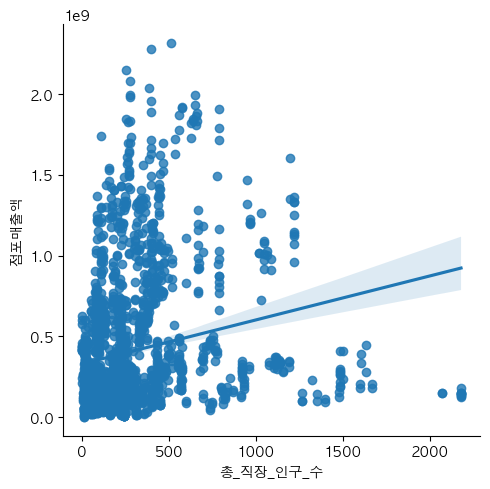

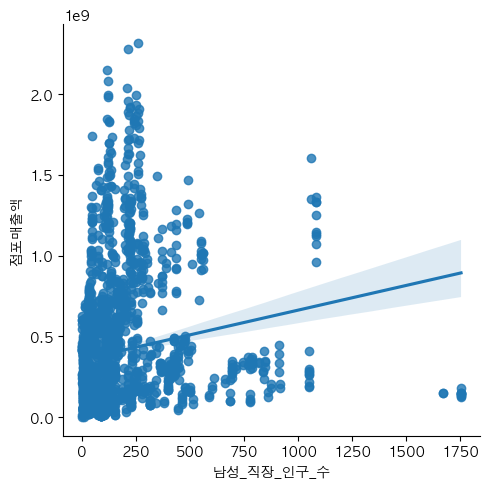

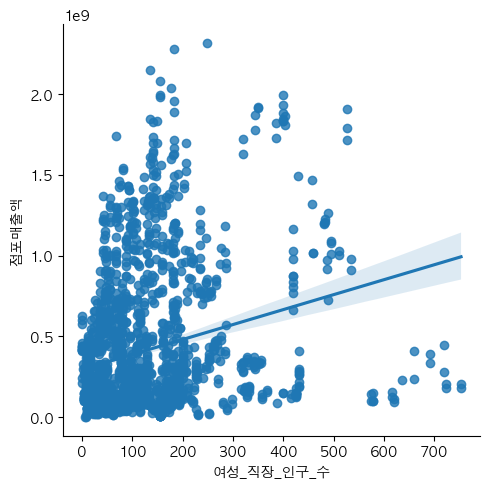

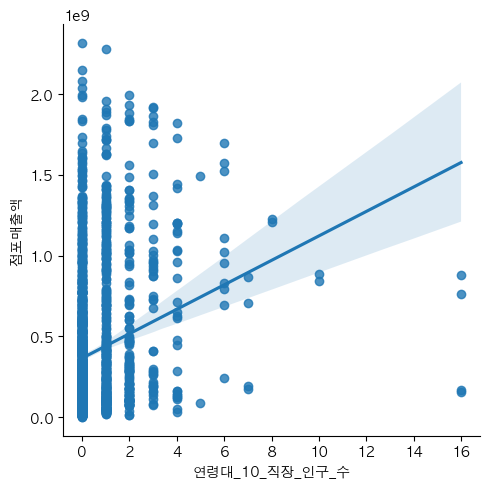

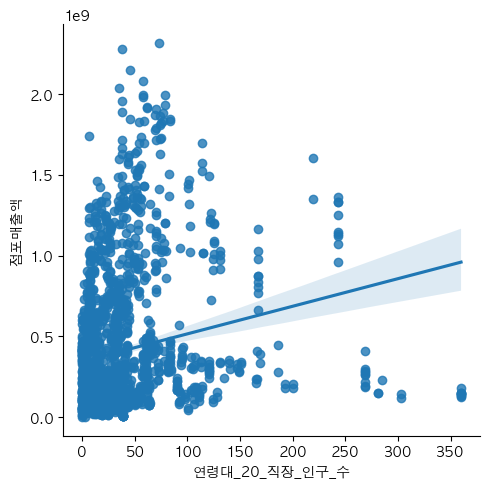

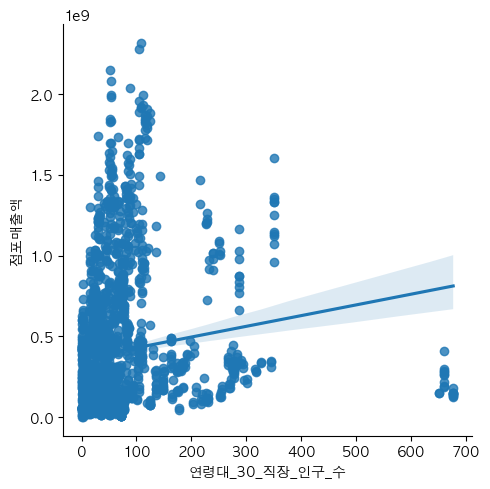

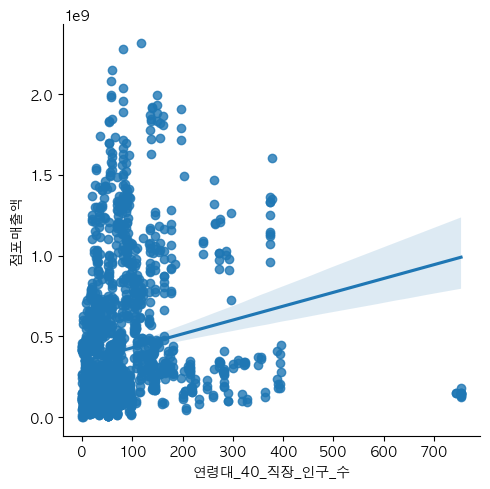

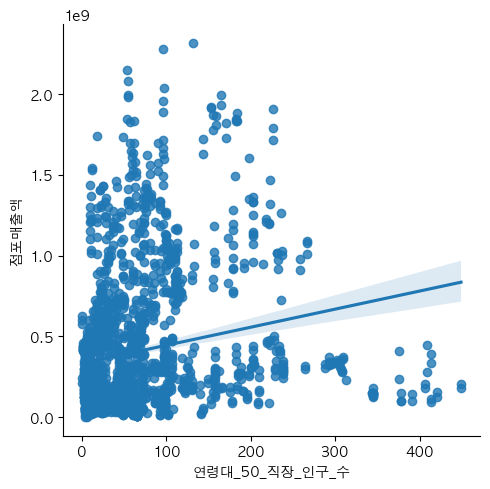

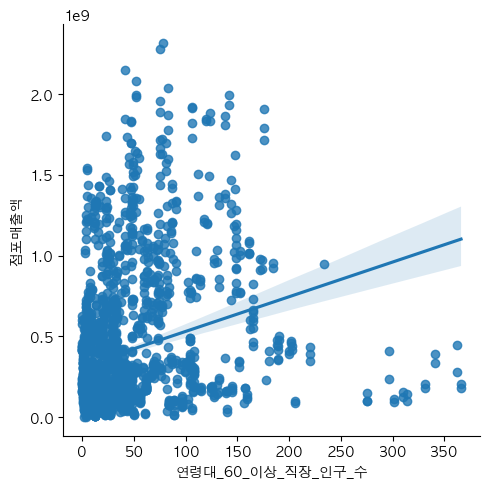

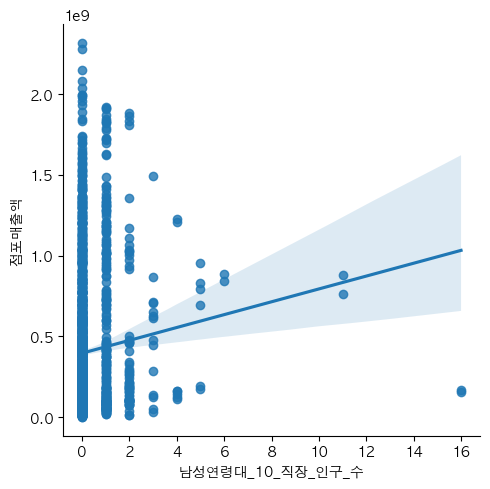

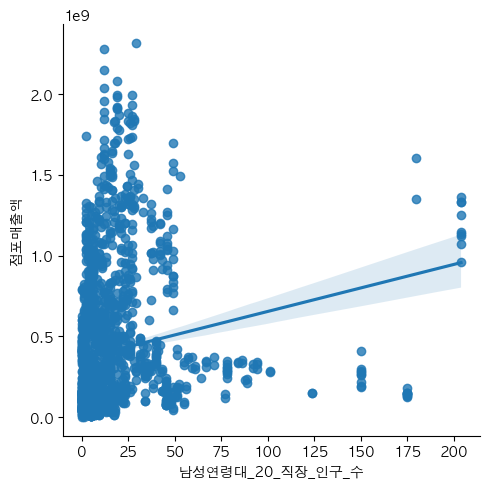

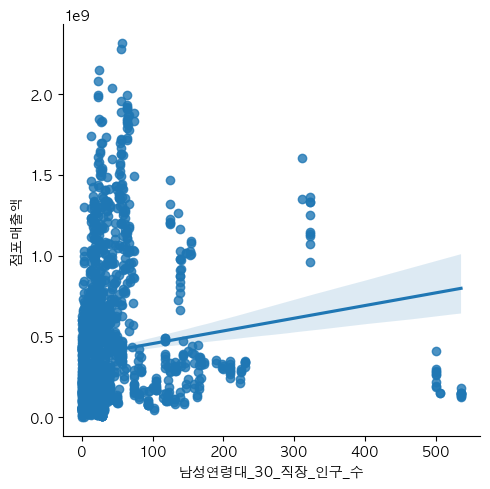

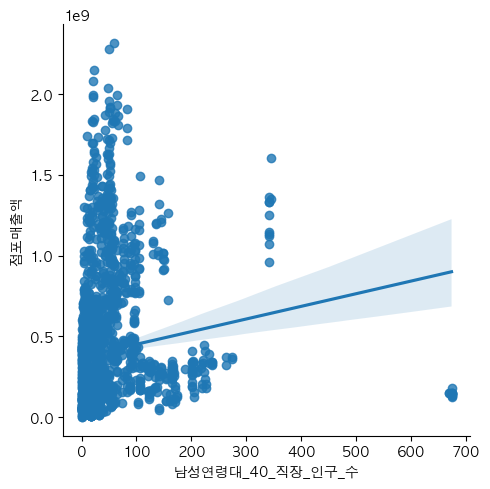

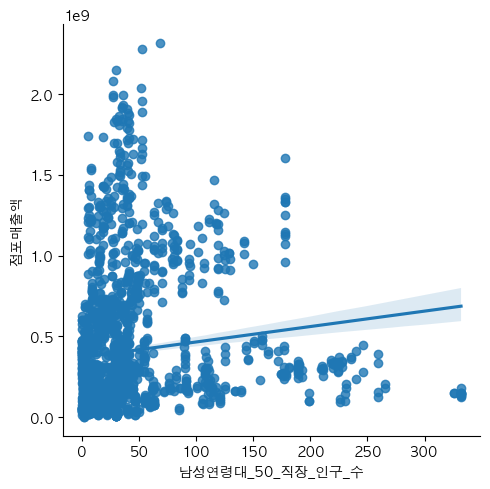

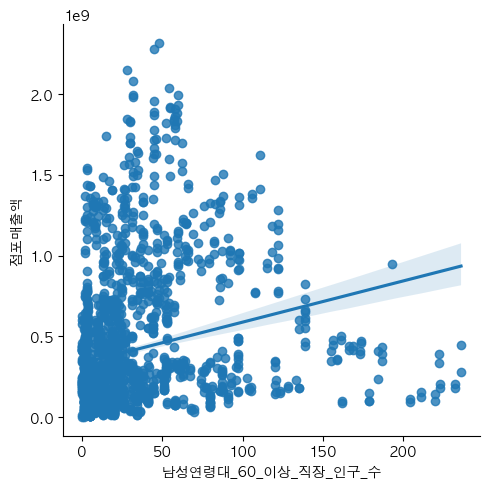

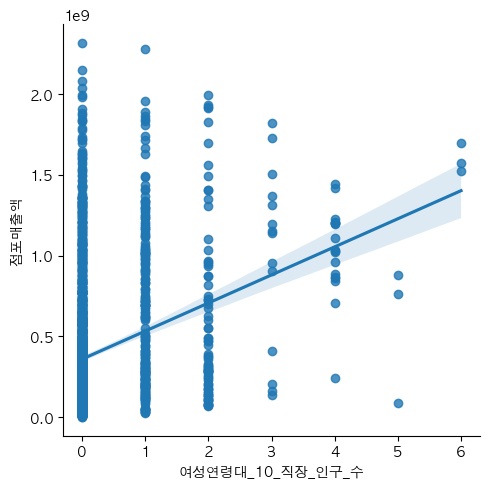

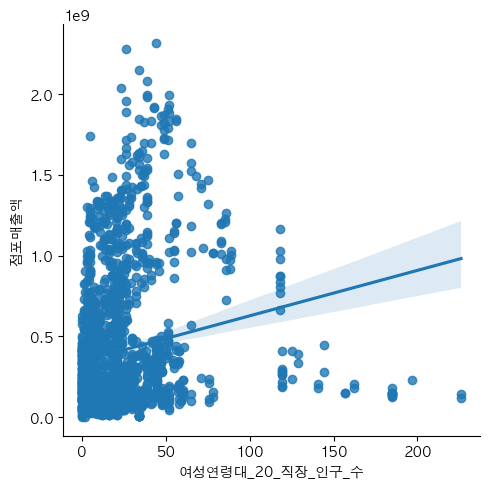

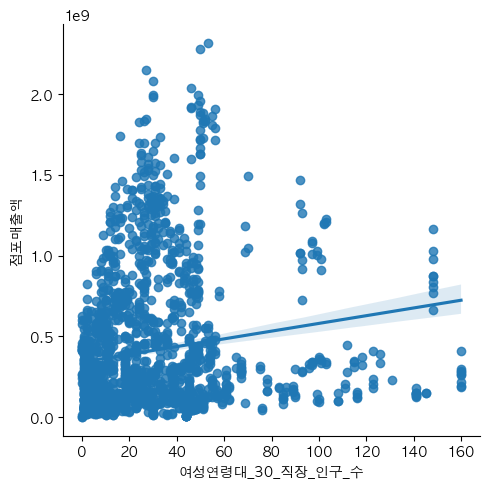

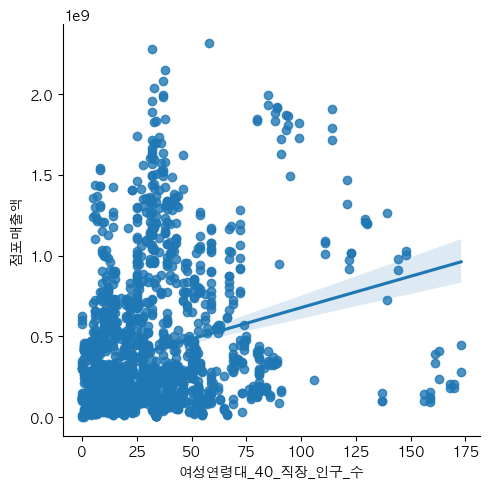

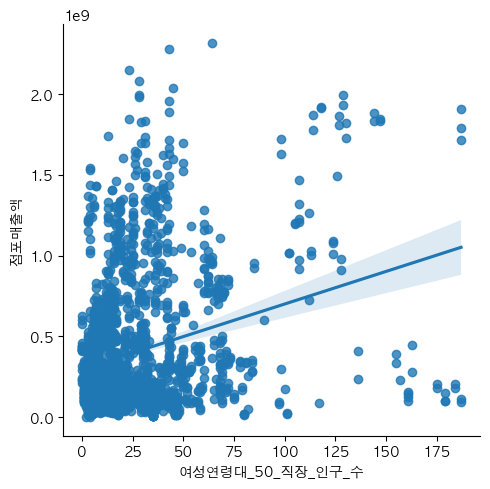

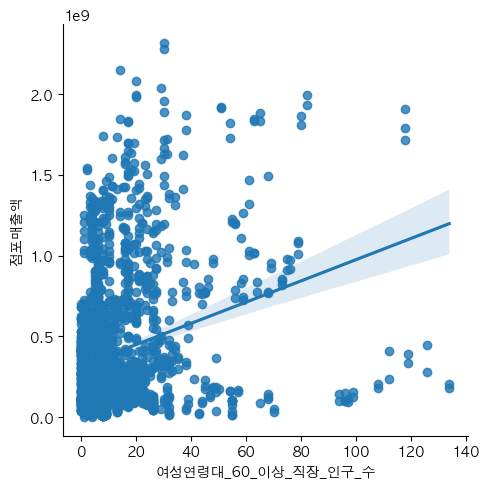

In [573]:
for feature in features:
    sns.lmplot(
        data=data,
        x= feature,
        y=target_name
    )

#### 다른 분포를 가진다고 할 만하게 없다. 
### 상관관계 찍어보자

<AxesSubplot: >

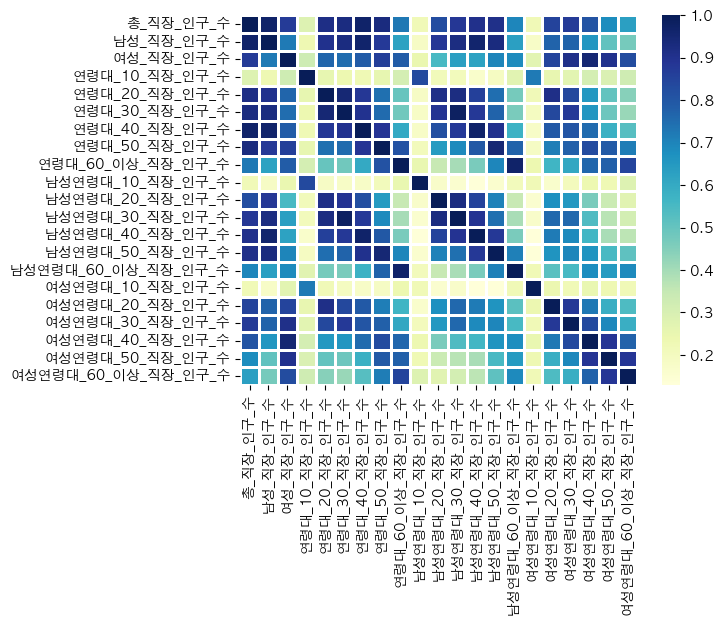

In [574]:
table=data[features].corr()
sns.heatmap(
	table,
	annot=False,
	fmt='f',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

### 10대 직장 인구수 빼고는 높은 상관관계를 가지기 때문에
### 이는 제외하고
### 총 직장 인구 수 연령대 10 직장 인구 수만 남기고 해보도록 하겠다잇

In [575]:
desc=data.iloc[:,:10]
target=data.iloc[:,12:13]
feature1=data.iloc[:,10:11]
feature2=data.iloc[:,13:15]
feature3=data[['총_직장_인구_수','연령대_10_직장_인구_수']]

In [576]:
data = pd.concat([desc,target,feature1,feature2,feature3],axis=1)

<AxesSubplot: >

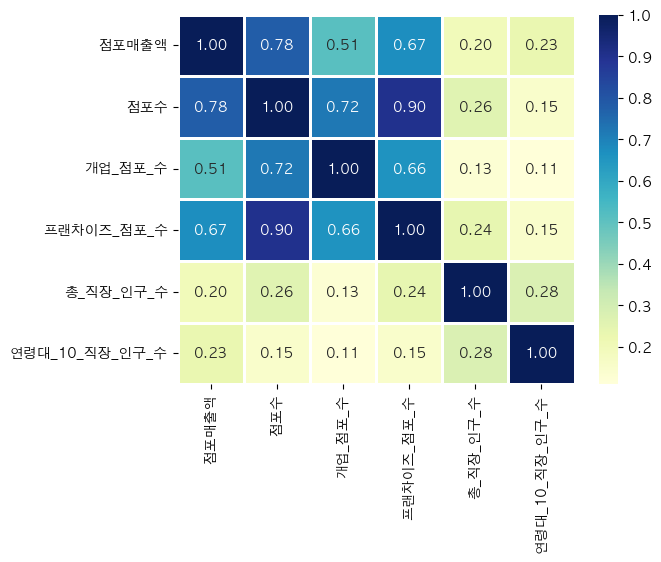

In [577]:
table=data.iloc[:,10:].corr()
sns.heatmap(
	np.round(table,2),
	annot=True,
	fmt='.2f',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

### 특성공학 조지기

In [578]:
from sklearn.preprocessing import PolynomialFeatures
train_input = data[['점포수','개업_점포_수','프랜차이즈_점포_수','총_직장_인구_수','연령대_10_직장_인구_수']]
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '1'

train_poly =np.log1p(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

columns

array(['점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '총_직장_인구_수1', '연령대_10_직장_인구_수1',
       '점포수^21', '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1',
       '점포수 연령대_10_직장_인구_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '개업_점포_수 총_직장_인구_수1', '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21',
       '프랜차이즈_점포_수 총_직장_인구_수1', '프랜차이즈_점포_수 연령대_10_직장_인구_수1',
       '총_직장_인구_수^21', '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21'],
      dtype=object)

In [579]:
data=pd.concat([data,train_poly],axis=1)

In [580]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '2'


train_poly =np.sqrt(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

In [581]:
data=pd.concat([data,train_poly],axis=1)

In [582]:
data=pd.get_dummies(data,columns=['행정동_코드_명'])

In [583]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1',
       '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1', '점포수 연령대_10_직장_인구_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '개업_점포_수 총_직장_인구_수1',
       '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21', '프랜차이즈_점포_수 총_직장_인구_수1',
       '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_

In [584]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1',
       '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1', '점포수 연령대_10_직장_인구_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '개업_점포_수 총_직장_인구_수1',
       '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21', '프랜차이즈_점포_수 총_직장_인구_수1',
       '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_인구_수2', '연령대_10_직장_인구_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [585]:
from module.default import basic
from module.error import model_err_measure
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8927128834856554
test :  0.811667974676293
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8155621159326586
test :  0.7939308387414261
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.8079161585167931
test :  0.7895052614023523
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.8079020223128864
test :  0.7887455860028202
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9898395284206328
test :  0.9284044743523798
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,3.538043e+16,1.338568e+08,1.880969e+08,0.727817
0,rd,3.632627e+16,1.355781e+08,1.905945e+08,0.717234
0,ls,3.658336e+16,1.362121e+08,1.912678e+08,0.718321


In [586]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1',
       '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1', '점포수 연령대_10_직장_인구_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '개업_점포_수 총_직장_인구_수1',
       '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21', '프랜차이즈_점포_수 총_직장_인구_수1',
       '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [587]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8890297653561525
test :  0.8143218174693493
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8028332806067032
test :  0.784265584677636
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7975824396116347
test :  0.7806272973630717
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7978042924465626
test :  0.7803309599491057
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9903643898476254
test :  0.93628214426196
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.742017e+16,1.499599e+08,2.177617e+08,0.699371
0,rd,4.827884e+16,1.523415e+08,2.197245e+08,0.689789
0,ls,4.830378e+16,1.528306e+08,2.197812e+08,0.692027


In [588]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_인구_수2', '연령대_10_직장_인구_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [589]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.881301813314767
test :  0.7981292023035528
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7947995754106201
test :  0.7766377687184648
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7947124588735391
test :  0.7768094442301708
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7947920170166396
test :  0.776542254410151
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9896580219688754
test :  0.926390666337878
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,3.734835e+16,1.430662e+08,1.932572e+08,0.710617
0,rd,3.743596e+16,1.426025e+08,1.934838e+08,0.707409
0,ls,3.762080e+16,1.432325e+08,1.939608e+08,0.708215


In [590]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [591]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8913943315783923
test :  0.8182276685355863
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7737511728256787
test :  0.7579795976792078
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7736831283024752
test :  0.7580992181925605
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7737511728256746
test :  0.7579795975750409
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9910470234759197
test :  0.9389709962949226
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.238242e+16,1.411495e+08,2.058699e+08,0.696949
0,rd,4.242742e+16,1.409089e+08,2.059792e+08,0.694882
0,ls,4.238242e+16,1.411495e+08,2.058699e+08,0.696949


In [592]:
data=pd.concat([data,desc['행정동_코드_명']],axis=1)

In [593]:
# 이거 다 넣을 때가 최고 인듯
data.to_csv('./Data2/final.csv',index=False)

In [594]:
data=pd.concat([desc,target,feature1,feature2],axis=1)

### 점포수 가지고만 특성공학 조지기

In [595]:
from sklearn.preprocessing import PolynomialFeatures
train_input = data[['점포수','개업_점포_수','프랜차이즈_점포_수']]
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '1'

train_poly =np.log1p(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

columns

array(['점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21'], dtype=object)

In [596]:
data=pd.concat([data,train_poly],axis=1)

In [597]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '2'


train_poly =np.sqrt(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

In [598]:
data=pd.concat([data,train_poly],axis=1)

In [599]:
data=pd.get_dummies(data,columns=['행정동_코드_명'])

In [600]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '프랜차이즈_점포_수^21',
       '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22', '점포수 개업_점포_수2',
       '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2', '프랜차이즈_점포_수^22',
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동'],
      dtype='object')

In [601]:
feature=data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '프랜차이즈_점포_수^21',
       '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22', '점포수 개업_점포_수2',
       '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2', '프랜차이즈_점포_수^22',
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동']]
target = data['점포매출액']

In [602]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8154242099850502
test :  0.7024888039438324
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7935517891152403
test :  0.7746507799410656
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.790247443238872
test :  0.7763026676451767
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7900221830773385
test :  0.7764896248452506
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9856971867337373
test :  0.9141188944885397
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.022996e+16,1.355901e+08,2.005741e+08,0.712185
0,rd,4.072756e+16,1.363843e+08,2.018107e+08,0.698390
0,ls,4.068261e+16,1.372917e+08,2.016993e+08,0.701188


In [603]:
feature=data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', 
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동']]
target = data['점포매출액']

In [604]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8374284381222346
test :  0.7523194425390709
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7881889558931674
test :  0.7698953615183479
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7864445819842761
test :  0.7688661198852426
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7870503086461174
test :  0.7689847818723441
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9866266232998735
test :  0.9156969931296164
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.692884e+16,1.501936e+08,2.166306e+08,0.728425
0,rd,4.730558e+16,1.500997e+08,2.174985e+08,0.726697
0,ls,4.714128e+16,1.502639e+08,2.171204e+08,0.728489


In [605]:
feature=data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22', '점포수 개업_점포_수2',
       '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2', '프랜차이즈_점포_수^22',
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동']]
target = data['점포매출액']

In [606]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8225085850827034
test :  0.7234564028749547
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7789763215770014
test :  0.76083756046608
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.778953052629584
test :  0.7607436475053063
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7790269959906089
test :  0.7611013794115552
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9869432520802915
test :  0.9200483437559905
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.220019e+16,1.419644e+08,2.054268e+08,0.684915
0,rd,4.211922e+16,1.414161e+08,2.052297e+08,0.681434
0,ls,4.217618e+16,1.419278e+08,2.053684e+08,0.683394


In [607]:
feature=data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동']]
target = data['점포매출액']

In [608]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8534620233861785
test :  0.7665149240373041
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7654876193289599
test :  0.7541351642047951
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7654148443760054
test :  0.754180029603084
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7654876193289561
test :  0.7541351647887605
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9870806028920864
test :  0.9204942269330921
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.253520e+16,1.422979e+08,2.062406e+08,0.674856
0,rd,4.251561e+16,1.420345e+08,2.061931e+08,0.672584
0,ls,4.253520e+16,1.422979e+08,2.062406e+08,0.674856
